In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head()
train.shape

(1460, 81)

In [5]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

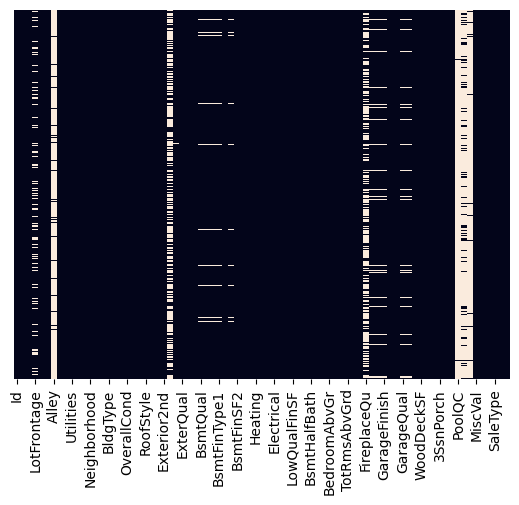

In [7]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [8]:
#Looking at the heatmap lets drop the ones that we know are too many missing values

train.drop(['Alley'], axis = 1, inplace = True)
train.drop(['Exterior2nd'], axis = 1, inplace = True)
train.drop(['FireplaceQu'], axis = 1, inplace = True)
train.drop(['PoolQC'], axis = 1, inplace = True)
train.drop(['Id'], axis = 1, inplace = True)

<Axes: >

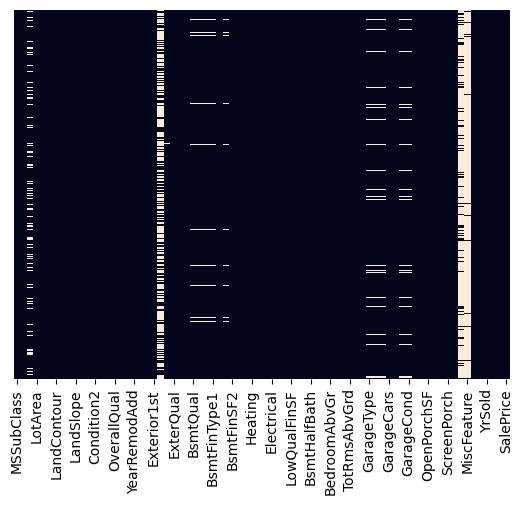

In [9]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [10]:
train.drop(['MasVnrArea'], axis = 1, inplace = True)
train.drop(['Fence'], axis = 1, inplace = True)

<Axes: >

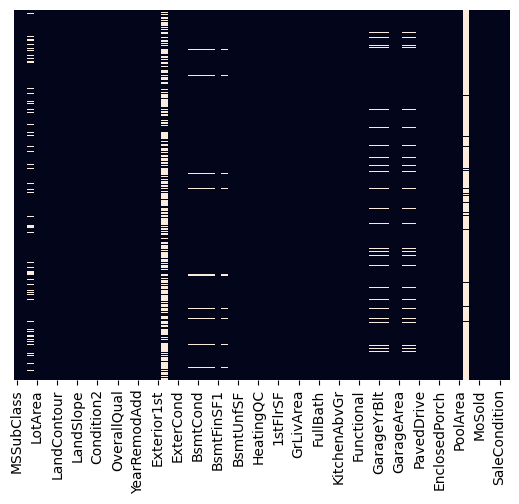

In [11]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [12]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [13]:
threshold = 0.5
train = train.loc[:, train.isnull().mean() < threshold]

<Axes: >

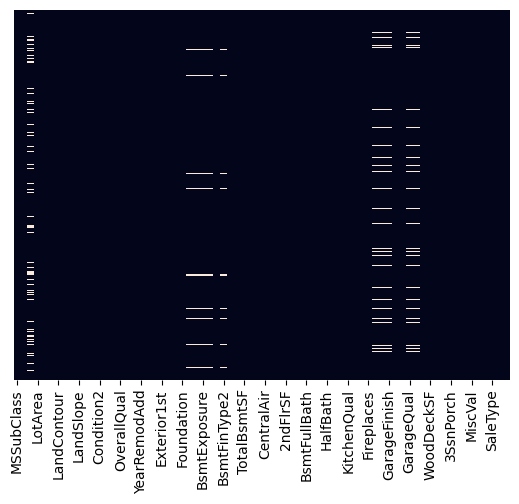

In [14]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [15]:
#Fill in any remaining missing values 
for column in train.columns:
    if train[column].isnull().any():  # Check if there are any null values in the column
        mode_value = train[column].mode()[0]  # Find the mode of the column
        train[column].fillna(mode_value, inplace=True)  # Replace null values with the mode

/tmp/ipykernel_18/3674609335.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(mode_value, inplace=True)  # Replace null values with the mode


<Axes: >

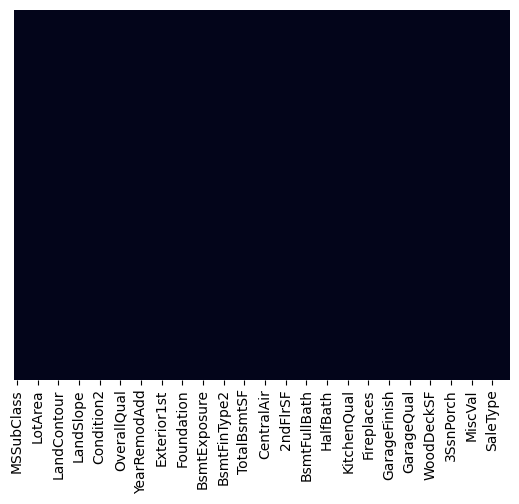

In [16]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

<Axes: >

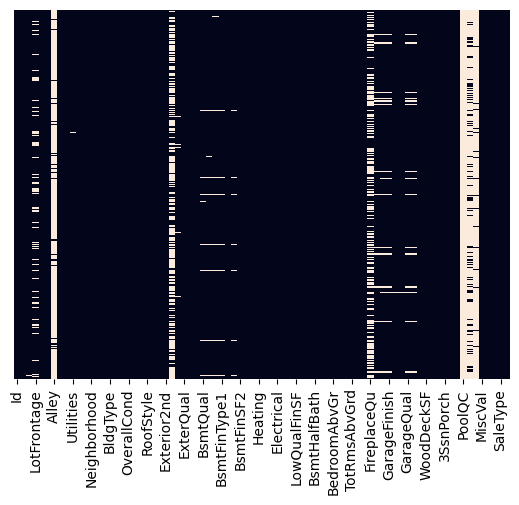

In [17]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

In [18]:
threshold = 0.5
test = test.loc[:, test.isnull().mean() < threshold]

In [19]:
#Fill in any remaining missing values 
for column in test.columns:
    if test[column].isnull().any():  # Check if there are any null values in the column
        mode_value = test[column].mode()[0]  # Find the mode of the column
        test[column].fillna(mode_value, inplace=True)  # Replace null values with the mode

/tmp/ipykernel_18/961640291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[column].fillna(mode_value, inplace=True)  # Replace null values with the mode


<Axes: >

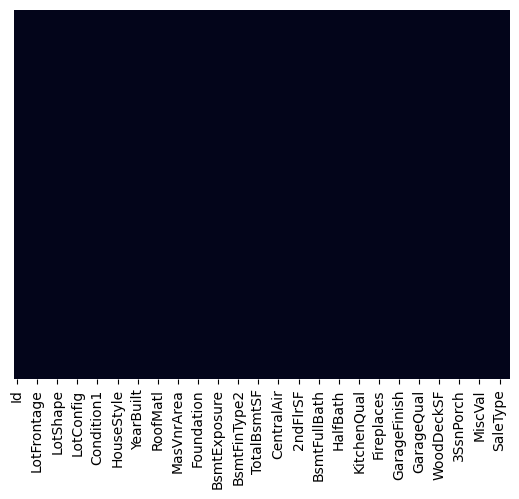

In [20]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

In [21]:
#Now that both of them are clean lets one hot encode and combine

#for knowing which is which
train['is_train'] = 1
test['is_train'] = 0

combined_df = pd.concat([train, test],ignore_index=True)

In [22]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = combined_df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
# Fit and transform the combined dataframe
encoded_data = one_hot_encoder.fit_transform(combined_df[categorical_columns])

# Creating a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and add encoded columns
combined_df = combined_df.drop(categorical_columns, axis=1)
combined_df = pd.concat([combined_df, encoded_df], axis=1)

combined_df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan
0,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Separate the datasets back into train and test sets
train_cleaned = combined_df[combined_df['is_train'] == 1].drop('is_train', axis=1)
test_cleaned = combined_df[combined_df['is_train'] == 0].drop('is_train', axis=1)

In [24]:
X = train_cleaned.drop(['SalePrice'], axis = 1)
y = train_cleaned['SalePrice']
X_test = test_cleaned.drop(['SalePrice'], axis=1)

In [25]:
from xgboost import XGBRegressor

# Initialize XGBRegressor
classifier = XGBRegressor()

# Train the model
classifier.fit(X, y)

# Predict on the test data
y_pred = classifier.predict(X_test)

In [26]:
y_pred

array([126034.71, 162372.3 , 188335.53, ..., 162667.39, 110336.97,
       205846.27], dtype=float32)

In [27]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred],axis = 1)
datasets.columns = ["Id", "SalePrice"]
datasets.to_csv("sample_submission.csv", index = False)